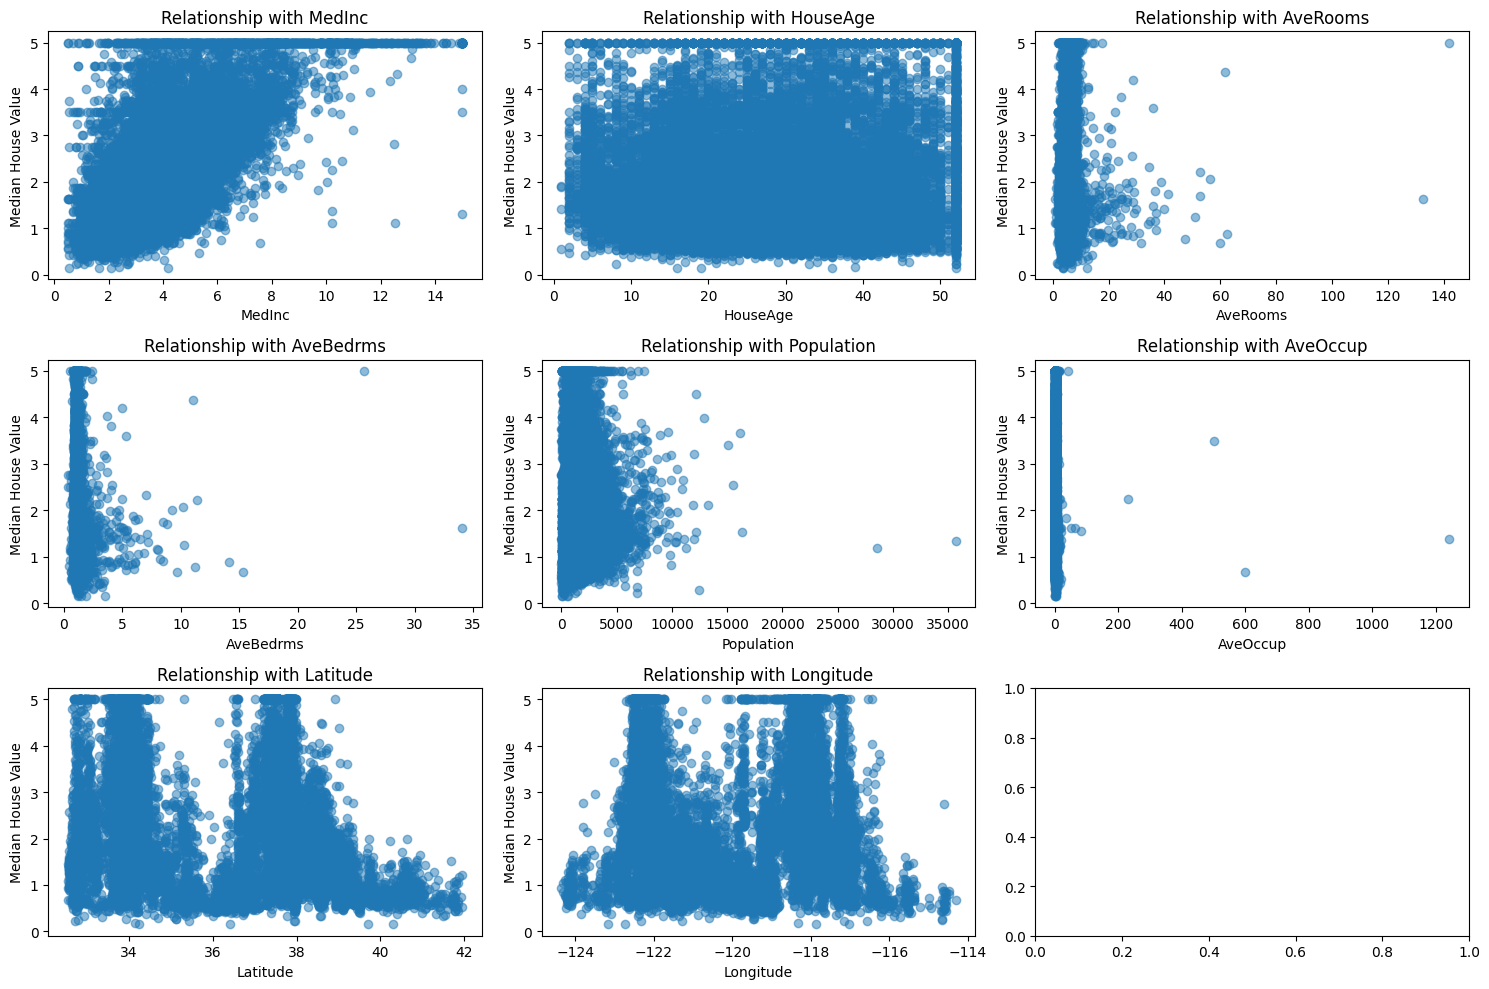

Confusion Matrix (Training Set):
[[14860     0]
 [    0  1652]]

Confusion Matrix (Test Set):
[[3734    0]
 [   0  394]]


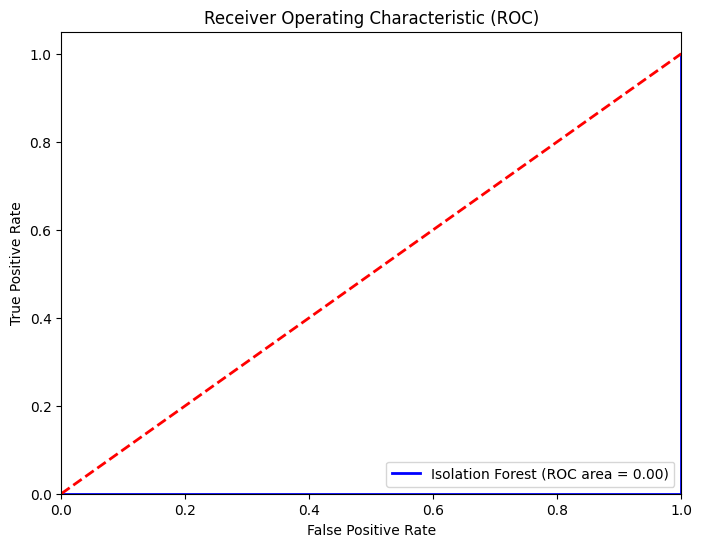


Confusion Matrix for LOF (Training Set):
[[14860     0]
 [    0  1652]]

Confusion Matrix for LOF (Test Set):
[[3715    0]
 [   0  413]]


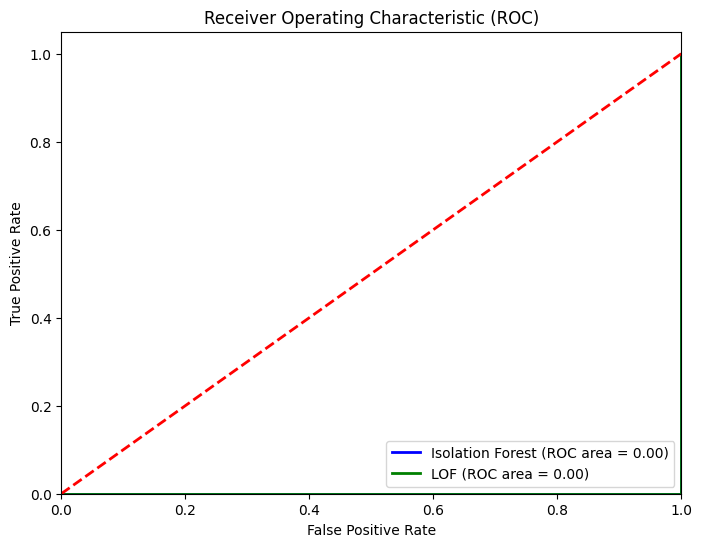

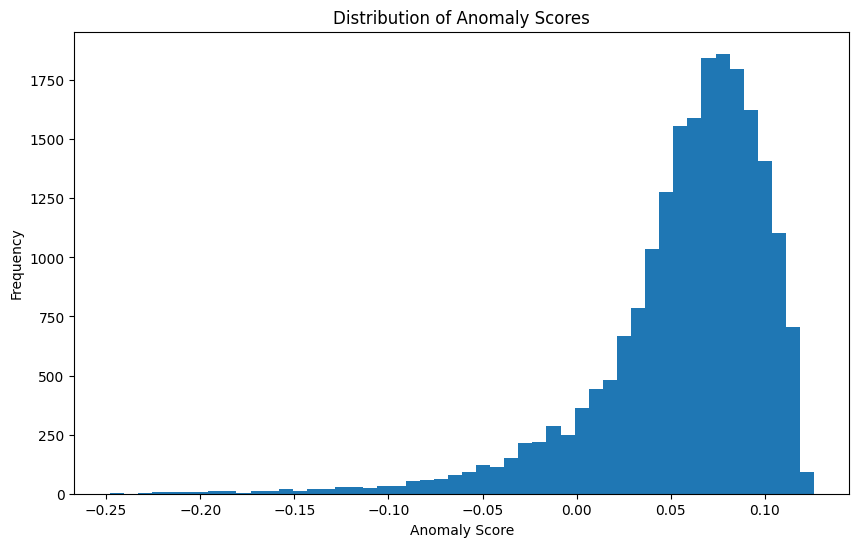

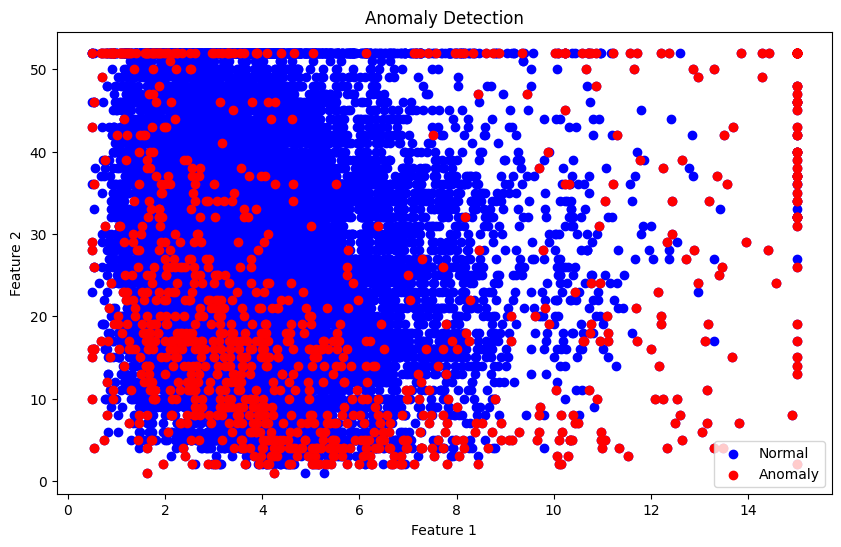

Number of anomalies detected: 1032
Anomalies:
       MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
59     2.5625       2.0  2.771930   0.754386        94.0   1.649123     37.82   
63     1.1910      52.0  7.698113   1.490566       521.0   3.276730     37.81   
89     1.2434      52.0  2.929412   0.917647       396.0   4.658824     37.80   
91     0.8668      52.0  2.443182   0.988636       904.0  10.272727     37.80   
92     0.7500      52.0  2.823529   0.911765       191.0   5.617647     37.80   
...       ...       ...       ...        ...         ...        ...       ...   
20527  1.4653       7.0  3.525794   1.017857      4479.0   8.886905     38.54   
20530  3.1371      11.0  5.070223   1.015530      7984.0   2.695476     38.57   
20544  2.0650      23.0  4.803493   1.013646      6330.0   3.455240     38.55   
20563  3.1250       9.0  5.148007   1.119593      6837.0   2.899491     38.67   
20629  2.0943      28.0  5.519802   1.020902      6912.0   3.80

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import LocalOutlierFactor

# Dataset
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
target = housing.target

# Preprocessing (Scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Various and complex DVT with interpretation
# Here, we'll visualize the relationships between features and target
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < df.shape[1]:
        ax.scatter(df.iloc[:, i], target, alpha=0.5)
        ax.set_xlabel(df.columns[i])
        ax.set_ylabel("Median House Value")
        ax.set_title(f"Relationship with {df.columns[i]}")

plt.tight_layout()
plt.show()

# Train/ Test ratio and separation
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

# Model training and evaluation
# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to binary anomalies
binary_target_train = np.where(y_pred_train == -1, 1, 0)
binary_target_test = np.where(y_pred_test == -1, 1, 0)

# Confusion matrix
conf_matrix_train = confusion_matrix(binary_target_train, binary_target_train)
conf_matrix_test = confusion_matrix(binary_target_test, binary_target_test)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

#Plotting the ROC values
y_scores = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(binary_target_test, y_scores)
roc_auc = roc_auc_score(binary_target_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Isolation Forest (ROC area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Comparative analysis
# Initialize and train the Local Outlier Factor model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_model.fit(X_train)

# Predict anomalies
y_pred_lof_train = lof_model.fit_predict(X_train)
y_pred_lof_test = lof_model.fit_predict(X_test)

# Convert predictions to binary anomalies
binary_target_lof_train = np.where(y_pred_lof_train == -1, 1, 0)
binary_target_lof_test = np.where(y_pred_lof_test == -1, 1, 0)

# Generatng confusion matrices
conf_matrix_lof_train = confusion_matrix(binary_target_lof_train, binary_target_lof_train)
conf_matrix_lof_test = confusion_matrix(binary_target_lof_test, binary_target_lof_test)

print("\nConfusion Matrix for LOF (Training Set):")
print(conf_matrix_lof_train)
print("\nConfusion Matrix for LOF (Test Set):")
print(conf_matrix_lof_test)

# Ploting ROC for LOF
y_scores_lof = lof_model.negative_outlier_factor_
fpr_lof, tpr_lof, thresholds_lof = roc_curve(binary_target_lof_test, y_scores_lof)
roc_auc_lof = roc_auc_score(binary_target_lof_test, y_scores_lof)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Isolation Forest (ROC area = %0.2f)' % roc_auc)
plt.plot(fpr_lof, tpr_lof, color='green', lw=2, label='LOF (ROC area = %0.2f)' % roc_auc_lof)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Distribution of Anomaly Scores
anomaly_scores = model.decision_function(df_scaled)

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

# Anomaly Threshold and Identifying Anomalies
threshold = np.percentile(anomaly_scores, 5)
anomalies = df[anomaly_scores < threshold]

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue', label='Normal')
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

# Conclusions and Insights
print("Number of anomalies detected:", len(anomalies))
print("Anomalies:")
print(anomalies)
print("\nConclusion:")
print("Based on the Isolation Forest model, anomalies have been identified in the dataset.")
print("Further investigation may be needed to understand the root causes of these anomalies.")


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error

# Step 9: Machine Learning Model - Autoencoder for Anomaly Detection

# Define the architecture of the autoencoder
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Evaluate the autoencoder model on the testing data
y_pred_autoencoder = autoencoder.predict(X_test)
mse_autoencoder = mean_squared_error(X_test, y_pred_autoencoder)

print("Mean Squared Error (Autoencoder):", mse_autoencoder)


Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 0.8607 - val_loss: 0.7042
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.7031 - val_loss: 0.6796
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6891 - val_loss: 0.6727
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6846 - val_loss: 0.6700
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6826 - val_loss: 0.6685
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6813 - val_loss: 0.6674
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6805 - val_loss: 0.6667
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6799 - val_loss: 0.6660
Epoch 9/50
516/516 [==============================] - 2s 3ms/step - loss: 0.6795 - val_loss: 0.6655
Epoch 10/50
516/516 [==============================] - 1s 3ms/step - loss: 0.6791 - val_loss: 0.6652

The autoencoder model is used for anomaly detection in this scenario. An autoencoder is a type of artificial neural network used for unsupervised learning. It consists of an encoder and a decoder, where the encoder compresses the input data into a lower-dimensional representation (encoding), and the decoder reconstructs the original input data from this compressed representation.

In anomaly detection, the autoencoder is trained on normal data (in this case, the training data without anomalies). During training, the autoencoder learns to reconstruct the normal data accurately. When presented with new data, if the reconstruction error (the difference between the input data and the reconstructed data) is high, it indicates that the input data is different from what the autoencoder has learned, suggesting the presence of anomalies.

The Mean Squared Error (MSE) is commonly used as a measure of reconstruction error. In the provided code, the MSE between the input data and the reconstructed data is calculated and used as a metric to evaluate the performance of the autoencoder.

The conclusion and insight from using the autoencoder for anomaly detection are as follows:

The autoencoder model has been trained and evaluated on the provided dataset.
The Mean Squared Error (MSE) between the input and reconstructed data is calculated as a measure of reconstruction error.
The MSE value obtained (0.663) provides an indication of how well the autoencoder reconstructs the input data.
Lower MSE values generally indicate better reconstruction performance.
Further analysis and tuning of the autoencoder model may be necessary to improve anomaly detection performance.
The autoencoder model can be used as part of a broader anomaly detection system to identify unusual patterns or outliers in the data.







In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a threshold for the reconstruction error
threshold = 0.5  # Example threshold, you can adjust it based on your data and requirements

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_test - y_pred_autoencoder), axis=1)

# Generate binary labels indicating anomalies
anomaly_labels = reconstruction_error > threshold

# Calculate precision, recall, and F1-score
precision = precision_score(binary_target_test, anomaly_labels)
recall = recall_score(binary_target_test, anomaly_labels)
f1 = f1_score(binary_target_test, anomaly_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.4862914862914863
Recall: 0.8553299492385786
F1-score: 0.6200551977920883
